In [1]:
import cv2
import os 
import matplotlib.pyplot as plt
import numpy as np 
from random import shuffle 
from tqdm import tqdm 
import tensorflow as tf
import pandas as pd
LR = 1e-3
IMG_SIZE_PX = 50 ## x,y axis
SLICE_COUNT = 20 ## z axis

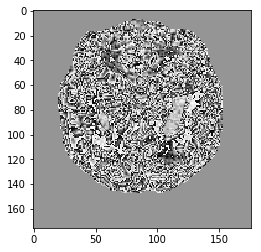

In [47]:
headdata = np.fromfile("F:\\masked_gfc_imgs\\OAS1_0001_MR1_mpr_n4_anon_111_t88_masked_gfc.img", dtype=np.int16)
hdata = headdata.reshape(176,208,176 )
plt.imshow(hdata[:,70,:],cmap="Greys")

In [48]:
slice_0 = hdata[88, :, :]
slice_1 = hdata[:, 104, :]
slice_2 = hdata[:, :, 88]

In [49]:
def show_slices(slices):
    fig, axes = plt.subplots(1, len(slices))
    for i, slice in enumerate(slices):
        axes[i].imshow(slice.T, cmap="gray", origin="lower")

Text(0.5, 0.98, 'Center slices for MRI image')

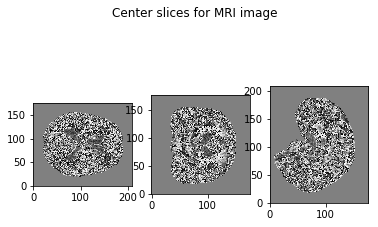

In [50]:
show_slices([slice_0, slice_1, slice_2])
plt.suptitle("Center slices for MRI image")

In [51]:
labels_df = pd.read_csv('C://Users//lvyue//Desktop//ML/oasis_cross-sectional.csv')
labels_df = labels_df.drop(columns=['M/F','Hand','Age','Educ','SES','MMSE','eTIV','nWBV','ASF','Delay'])
labels_df = labels_df.fillna(0)
labels_df.head()

,ID,CDR
0,OAS1_0001_MR1,0.0
1,OAS1_0002_MR1,0.0
2,OAS1_0003_MR1,0.5
3,OAS1_0004_MR1,0.0
4,OAS1_0005_MR1,0.0


In [2]:
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation, Flatten
from keras.layers.convolutional import Convolution3D, MaxPooling3D

from keras.optimizers import SGD, RMSprop
from keras.utils import np_utils, generic_utils
from keras import backend as K
K.set_image_dim_ordering('th')
#import theano
#from sklearn.cross_validation import train_test_split
#from sklearn import cross_validation
#from sklearn import preprocessing

Using TensorFlow backend.


In [3]:
TRAIN_DIR = 'F:\\masked_gfc_imgs'

In [3]:
# image specification
img_rows,img_cols,img_depth=88,104,88

In [8]:
from scipy.ndimage import zoom
training_test_data = [] 
for img in tqdm(os.listdir(TRAIN_DIR)):
    path = os.path.join(TRAIN_DIR, img)
    imgs = np.fromfile(path, dtype=np.int16)
    if len(imgs)==6443008:
        names = img.split('_mpr')[0]
        imgs = imgs.reshape(176,208,176)
        new = zoom(imgs,(0.5,0.5,0.5))
        image = np.array(new)
        training_test_data.append(image) 
        
np.save('train_test_3D_data.npy',  training_test_data)        



  0%|                                                                                          | 0/437 [00:00<?, ?it/s]

  0%|▏                                                                                 | 1/437 [00:00<06:21,  1.14it/s]

  0%|▍                                                                                 | 2/437 [00:01<06:24,  1.13it/s]

  1%|▌                                                                                 | 3/437 [00:02<06:26,  1.12it/s]

  1%|▊                                                                                 | 4/437 [00:03<06:26,  1.12it/s]

  1%|▉                                                                                 | 5/437 [00:04<06:29,  1.11it/s]

  1%|█▏                                                                                | 6/437 [00:05<06:27,  1.11it/s]

  2%|█▎                                                                                | 7/437 [00:06<06:37,  1.08it/s]

  2%|█▌                       

 31%|████████████████████████▌                                                       | 134/437 [02:00<04:40,  1.08it/s]

 31%|████████████████████████▋                                                       | 135/437 [02:01<04:38,  1.09it/s]

 31%|████████████████████████▉                                                       | 136/437 [02:02<04:46,  1.05it/s]

 31%|█████████████████████████                                                       | 137/437 [02:03<04:46,  1.05it/s]

 32%|█████████████████████████▎                                                      | 138/437 [02:04<04:47,  1.04it/s]

 32%|█████████████████████████▍                                                      | 139/437 [02:05<04:44,  1.05it/s]

 32%|█████████████████████████▋                                                      | 140/437 [02:06<04:46,  1.04it/s]

 32%|█████████████████████████▊                                                      | 141/437 [02:06<04:37,  1.07it/s]

 32%|█████████████████████████▉ 

 61%|█████████████████████████████████████████████████                               | 268/437 [03:58<02:27,  1.14it/s]

 62%|█████████████████████████████████████████████████▏                              | 269/437 [03:58<02:26,  1.15it/s]

 62%|█████████████████████████████████████████████████▍                              | 270/437 [03:59<02:25,  1.15it/s]

 62%|█████████████████████████████████████████████████▌                              | 271/437 [04:00<02:24,  1.15it/s]

 62%|█████████████████████████████████████████████████▊                              | 272/437 [04:01<02:23,  1.15it/s]

 62%|█████████████████████████████████████████████████▉                              | 273/437 [04:02<02:22,  1.15it/s]

 63%|██████████████████████████████████████████████████▏                             | 274/437 [04:03<02:21,  1.15it/s]

 63%|██████████████████████████████████████████████████▎                             | 275/437 [04:04<02:20,  1.15it/s]

 63%|███████████████████████████

 92%|█████████████████████████████████████████████████████████████████████████▌      | 402/437 [05:57<00:31,  1.10it/s]

 92%|█████████████████████████████████████████████████████████████████████████▊      | 403/437 [05:58<00:30,  1.12it/s]

 92%|█████████████████████████████████████████████████████████████████████████▉      | 404/437 [05:58<00:29,  1.13it/s]

 93%|██████████████████████████████████████████████████████████████████████████▏     | 405/437 [05:59<00:28,  1.14it/s]

 93%|██████████████████████████████████████████████████████████████████████████▎     | 406/437 [06:00<00:27,  1.14it/s]

 93%|██████████████████████████████████████████████████████████████████████████▌     | 407/437 [06:01<00:26,  1.15it/s]

 93%|██████████████████████████████████████████████████████████████████████████▋     | 408/437 [06:02<00:25,  1.15it/s]

 94%|██████████████████████████████████████████████████████████████████████████▊     | 409/437 [06:03<00:24,  1.16it/s]

 94%|███████████████████████████

In [4]:
training_test_data = np.load('train_test_3D_data.npy')

In [5]:
training_test = []
#print(image.shape)
print(len(training_test_data))
print(training_test_data[1].shape)
training_test = np.asarray(training_test_data)

436
(88, 104, 88)


In [6]:
print(training_test.shape)
print(len(training_test))
print(training_test[1].shape)

(436, 88, 104, 88)
436
(88, 104, 88)


In [7]:
x_train = np.asarray(training_test[:360])# convert the frames read into array

In [8]:
x_test = np.asarray(training_test[360:])
print(x_test.shape)

(76, 88, 104, 88)


In [9]:
X_train = x_train.reshape(x_train.shape[0], 1, img_rows,img_cols,img_depth).astype('float32')
X_test = x_test.reshape(x_test.shape[0], 1, img_rows,img_cols,img_depth).astype('float32')


In [10]:
X_train -= np.mean(X_train)

X_train /=np.max(X_train)
print(X_train.shape)

(360, 1, 88, 104, 88)


In [11]:
# CNN Training parameters
n_classes = 4 ## y labels 0, 0.5, 1, 2
batch_size = 10

x = tf.placeholder('float')
y = tf.placeholder('float')

keep_rate = 0.8

In [14]:
# number of convolutional filters to use at each layer
nb_filters = [  32,   # 1st conv layer
                32    # 2nd
             ]

# level of pooling to perform at each layer (POOL x POOL)
nb_pool = [4, 4]

# level of convolution to perform at each layer (CONV x CONV)
nb_conv = [3,3]

In [16]:
# Define model

model = Sequential()

#model.add(Convolution3D(nb_filters[0],nb_depth=nb_conv[0], nb_row=nb_conv[0], nb_col=nb_conv[0], input_shape=(1, img_rows, img_cols, img_depth), activation='relu'))

model.add(Convolution3D(
    nb_filters[0],
    kernel_dim1=nb_conv[0], # depth
    kernel_dim2=nb_conv[0], # rows
    kernel_dim3=nb_conv[0], # cols
    input_shape=(1, img_rows, img_cols, img_depth),
    activation='relu'
))

model.add(MaxPooling3D(pool_size=(nb_pool[0], nb_pool[0], nb_pool[0])))

model.add(Dropout(0.5))

model.add(Convolution3D(
    nb_filters[0],
    kernel_dim1=nb_conv[0], # depth
    kernel_dim2=nb_conv[0], # rows
    kernel_dim3=nb_conv[0], # cols
    input_shape=(1, img_rows, img_cols, img_depth),
    activation='relu'
))
model.add(MaxPooling3D(pool_size=(nb_pool[0], nb_pool[0], nb_pool[0])))

model.add(Dropout(0.5))

model.add(Flatten())

model.add(Dense(128, init='normal', activation='relu'))

model.add(Dropout(0.5))

model.add(Dense(4,init='normal'))

model.add(Activation('softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

print(model.summary())

C:\Users\lvyue\Anaconda32\lib\site-packages\ipykernel_launcher.py:13: UserWarning: Update your `Conv3D` call to the Keras 2 API: `Conv3D(32, (3, 3, 3), input_shape=(1, 88, 10..., activation="relu")`
  del sys.path[0]
C:\Users\lvyue\Anaconda32\lib\site-packages\ipykernel_launcher.py:26: UserWarning: Update your `Conv3D` call to the Keras 2 API: `Conv3D(32, (3, 3, 3), input_shape=(1, 88, 10..., activation="relu")`
C:\Users\lvyue\Anaconda32\lib\site-packages\ipykernel_launcher.py:34: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(128, activation="relu", kernel_initializer="normal")`
C:\Users\lvyue\Anaconda32\lib\site-packages\ipykernel_launcher.py:38: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(4, kernel_initializer="normal")`


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv3d_3 (Conv3D)            (None, 32, 86, 102, 86)   896       
_________________________________________________________________
max_pooling3d_3 (MaxPooling3 (None, 32, 21, 25, 21)    0         
_________________________________________________________________
dropout_5 (Dropout)          (None, 32, 21, 25, 21)    0         
_________________________________________________________________
conv3d_4 (Conv3D)            (None, 32, 19, 23, 19)    27680     
_________________________________________________________________
max_pooling3d_4 (MaxPooling3 (None, 32, 4, 5, 4)       0         
_________________________________________________________________
dropout_6 (Dropout)          (None, 32, 4, 5, 4)       0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 2560)              0         
__________

In [17]:
y_train_test = np.load('y_data.npy')
y_train = np.asarray(y_train_test[:360])
y_test = np.asarray(y_train_test[360:])
print(y_test.size)
## Data
y_test_OH = pd.get_dummies(np.array(y_test))
y_train_OH = pd.get_dummies(np.array(y_train))
print(y_test_OH.shape[1])

76
4


In [18]:
# Train the model
epochs = 3
hist = model.fit(X_train, y_train_OH, validation_data=(X_test, y_test_OH),batch_size=batch_size,epochs = epochs)


#hist = model.fit(train_set, Y_train, batch_size=batch_size,
#         nb_epoch=nb_epoch,validation_split=0.2, show_accuracy=True,
#           shuffle=True)


Instructions for updating:
Use tf.cast instead.
Train on 360 samples, validate on 76 samples
Epoch 1/3
220/360 [=================>............] - ETA: 46:21 - loss: 1.5263 - acc: 0.30 - ETA: 42:59 - loss: 0.9745 - acc: 0.60 - ETA: 41:15 - loss: 1.0394 - acc: 0.66 - ETA: 39:47 - loss: 1.5308 - acc: 0.65 - ETA: 38:32 - loss: 1.5298 - acc: 0.66 - ETA: 37:03 - loss: 1.4200 - acc: 0.68 - ETA: 35:40 - loss: 1.3430 - acc: 0.70 - ETA: 34:07 - loss: 1.2584 - acc: 0.71 - ETA: 32:39 - loss: 1.2628 - acc: 0.68 - ETA: 31:20 - loss: 1.2159 - acc: 0.69 - ETA: 30:01 - loss: 1.2004 - acc: 0.67 - ETA: 28:43 - loss: 1.1840 - acc: 0.65 - ETA: 27:26 - loss: 1.1732 - acc: 0.63 - ETA: 26:10 - loss: 1.1506 - acc: 0.62 - ETA: 24:47 - loss: 1.1394 - acc: 0.60 - ETA: 26:40 - loss: 1.1289 - acc: 0.60 - ETA: 24:34 - loss: 1.1131 - acc: 0.60 - ETA: 23:05 - loss: 1.0889 - acc: 0.61 - ETA: 21:41 - loss: 1.0799 - acc: 0.61 - ETA: 20:18 - loss: 1.0803 - acc: 0.61 - ETA: 18:57 - loss: 1.0655 - acc: 0.62 - ETA: 17:34 - l

KeyboardInterrupt: 

In [ ]:
# Evaluate the model
score = model.evaluate(X_val_new, y_val_new, batch_size=batch_size, show_accuracy=True)
print('Test score:', score[0])
print('Test accuracy:', score[1]) 

In [ ]:
# Plot the results
train_loss=hist.history['loss']
val_loss=hist.history['val_loss']
train_acc=hist.history['acc']
val_acc=hist.history['val_acc']
xc=range(100)

plt.figure(1,figsize=(7,5))
plt.plot(xc,train_loss)
plt.plot(xc,val_loss)
plt.xlabel('num of Epochs')
plt.ylabel('loss')
plt.title('train_loss vs val_loss')
plt.grid(True)
plt.legend(['train','val'])
print plt.style.available # use bmh, classic,ggplot for big pictures
plt.style.use(['classic'])

plt.figure(2,figsize=(7,5))
plt.plot(xc,train_acc)
plt.plot(xc,val_acc)
plt.xlabel('num of Epochs')
plt.ylabel('accuracy')
plt.title('train_acc vs val_acc')
plt.grid(True)
plt.legend(['train','val'],loc=4)
#print plt.style.available # use bmh, classic,ggplot for big pictures
plt.style.use(['classic'])